# Prelab 3 Transcriptional Cascades and 3D Plots

> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/4/4 (Week 3)

Edit this document directly. As you go through the notebooks you will find numbered questions. Please answer in the cells provided. 
   
This is an individual assignment, but you are allowed (encouraged!) to work together in groups and discuss coding and
answers. That said, you are responsible for all the material in this laboratory assignment. **DO NOT
COPY from anyone that you work with.** You are **NOT** allowed to share code. You need to write the code
and answer the questions yourself. Try the coding yourself first before seeking help.

<div class="alert alert-info" role="alert">

Please rename your notebook to `Lastname_Firstname_prelab#` and export it as HTML for submission

__Total Points 5__

__Due: 4/4 Thursday 1:30 pm__ 
</div>


## Part 1 Python Basics Continues: Indexing and Slicing

__This part is not graded. If you feel comfortable indexing and slicing 2d arrays in python you can skip to Part 2__

Let's talk about indexing in python. When you have a data type that holds multiple values e.g. lists, tuples, numpy arrays, the individual elements have an **index**, which indicates its **position** in a list.   
    
Let's consider this simple list:

In [8]:
A = [10,15,11,13,12]
print(A)

[10, 15, 11, 13, 12]


Our list A has 5 elements in it, each with its own index indicating position.    

**Python indexes from 0, which means the first element in a list has an index of 0**   

We can access a specific element in a list using square brackets [ ] e.g.

In [9]:
A[0]

10

See how giving it the index of 0 returns the first position in the list? Try changing the index between 0 and 4 and see that you can get each element in the list.

### Slicing

Sometimes you may want to get more than one element from a list and that's where __slicing__ comes in handy.
Slicing the list returns a _subsequence_ of the original one.

In terms of syntax, slicing should remind you of indexing a list and creating a `range`

```python
A[firstind:lastind]
```

Keep in mind that the element at the start index is included but the one at the end index is not.
It follows the same convention as the `range` function or `arange` from numpy. E.g.

```python
A[0:3]
```

Will return a subsequence of `A` that includes elements at indices 0, 1, and 2, but not 3!
See for yourself

In [15]:
print("A:")
print(A)

print("\nA[0:3]:")
print(A[0:3])

A:
[10, 15, 11, 13, 12]

A[0:3]:
[10, 15, 11]


Slicing comes with _syntactic sugar_ that makes our life easier.
You can omit the start index and/or the end index. If you do, the start index will default to 0 and the end index will default to length of the list. E.g. `A[:3]` is exactly the same as `A[0:3]`

In [19]:
print("A[:3]")
print(A[:3])

A[:3]
[10, 15, 11]


As a natural extension, `A[:]` is a subsequence of `A` from the first element to the last, i.e.
`A[:]` is a copy of `A`.

A shorthand to get the last element of a list/array is

```python
A[-1]
```

As expected `A[-2]` gives the second last element and `A[-3]` gives the third last element, etc. 

Try to get the last three elements of `A` with what you've just learned

In [1]:
# your answer to this ungraded question



### Indexing a 2D Array

Till now we've been working with 1 dimensional arrays and lists, but this lab will start using 2 dimensional numpy arrays. Let's use the following simple array as an example

In [2]:
import numpy as np
twoDarray = np.array([[10,15,17],[20,14,55],[30,32,70]])
print(twoDarray)

[[10 15 17]
 [20 14 55]
 [30 32 70]]


We can consider a 2d array as a list of lists (you can see each row is in square brackets like a list, and the row lists are also contained in a pair of square brackets

```python
[[row1col1, row1col2, row1col3],
 [row2col1, row2col2, row2col3],
 [row3col1, row3col2, row3col3]]
```

It's okay to make a line break immediately before or after a comma - a useful trick to make your code easier to read.

Indexing with a single integer will return an element of the list of lists.
The element, as you would expect, is itself a list!
In another word, indexing a 2D array with a single integer gives you a __row__. Try it yourself

In [25]:
print("row 1:")
print(twoDarray[0])

print("row 2:")
print(twoDarray[1])

print("row 3:")
print(twoDarray[2])

row 1:
[10 15 17]
row 2:
[20 14 55]
row 3:
[30 32 70]


now to specify the **column** you want, you need to provide a second index using the following syntax:

```python
array[row, column]
```
 
the **comma** indicates you have multiple dimensions.
One caveat is that this syntax __only works for numpy arrays__ but not native Python nested lists.
As you continue your coding journey you'll find that numpy array is a "smarter" data type than the
built-in list.

In [33]:
print(twoDarray)
print("Row 2, Column 2:")
print(twoDarray[1,1])

[[10 15 17]
 [20 14 55]
 [30 32 70]]
Row 2, Column 2:
14


Print row 1 column 3:

In [2]:
# your answer to this ungraded question



### Slicing a 2D Array

In this week's lab, you will need to get a whole column of a 2D array. 
To slice a 2D array, you will slice each _dimension_ in exactly the same way as slicing an 1D array.
You will first specify a range of _rows_, followed by a range of _columns_, separated by a comma. E.g.

```python
array[rowstart:rowstop, columnstart:columnstop]
```

As a natural extension, you can slice a higher dimensional array by `array[first-D range, second-D range, third-D range, ...]`

In [37]:
print(twoDarray)
print("Rows 2-3, Columns 2-3:")
print(twoDarray[1:3,1:3])

[[10 15 17]
 [20 14 55]
 [30 32 70]]
Rows 2-3, Columns 2-3:
[[14 55]
 [32 70]]


Recall that if a range is given by a single colon, it includes all elements.
In 2D, you can use this trick to extract a bunch of rows

```
array[rowstart:rowstop, :]
```

or a bunch of columns

```
array[:, columnstart:columnstop]
``` 
    
E.g. to get the 2nd column of our array

In [27]:
print(twoDarray)
print("Columns 2:")
print(twoDarray[:, 1])

[[10 15 17]
 [20 14 55]
 [30 32 70]]
Columns 2:
[15 14 32]


## Part 2 Transcriptional Cascades

Different from the one-node motifs in Lab 2, the transcriptional cascade here has two state variables, the expression level of gene $X$ and gene $Y$.
To model such a system we'll need a 2D ODE.
In this section I'll walk you through how to numerically find the solution to an n-dimentional (n > 1) ODE.

Consider a two-gene transcriptional cascade. Transcription of gene $X$ is under the control of a small molecule signal, $S$. 
$X$ then activates $Y$ (Read $Y$ as the _activated_ form of Y. The model here doesn't consider the inactive form of Y)

<img src="https://github.com/dschnitkey/BIOS20236/blob/main/simple%20cascade.png?raw=true" alt= “simple_cascade” width="300">

First, write down a system of ODEs to model the system.
As we've learned in class, we'll simply call the production rate of $X$ as $S$. You can imagine $S$ being 1 or 0 depending on the existence of the signal (triggered by e.g. the absence of glucose).
The production rate of $Y$ is scaled by a Hill function of $X$. This makes sense because $X$ activates the production of $Y$.
Both genes assume first-order degradation. To summarize

$$
\begin{align}
\frac{dX}{dt} &= S - \alpha_X X\\
\frac{dY}{dt} &= \beta \left(\frac{X^n}{K_X^n + X^n}\right) - \alpha_Y Y
\end{align}
$$

Then, translate the RHS of the ODEs to a Python function.
Below is an example. Note that different from an 1D ODE, the state variable $L$ and the derivative (returned)
are both length-2 vectors.


```python
def function_name(L, t, param1, param2, ...):
    #L is an array containing the values for the state variables
    #L[0] = X and L[1] = Y indexing starts at 0
    x,y = L
    dxdt = RHS
    dydt = RHS
    return [dxdt,dydt]
```

As you may've noticed, a very helpful feature of Python is to assign multiple variables at the same time. E.g.

```python
x, y = [1, 2]
```

Be sure that the number of variables on the LHS of the assignment equals to the length of the list/tuple on the RHS.
        
When you pass the RHS function into `odeint` you will also have to pass the intial values as a length-2 array. E.g.

```python
init_values = [X0, Y0] # order sets up how L will be passed to the global funciton.

sol = odeint(function_name, init_values, timespan, args = (input1, input2))

plt.figure()
plt.plot(timespan,out[:,0]) #indexing stats at zero. This will plot the solution to X vs. Time
```

The solution now, of course, is a 2D array. Each column is a different state variable (first column is $X$, second column is $Y$)
and each row is a different time point. Try it yourself!

<h3 style="color:blue;">Tasks for Part 2</h3>

__2.1__ First define the RHS function for the transcriptional cascade. Then solve and plot $X$ and $Y$ as a function of time

Set $S = 1$ (so that the input to the cascade is constitutively on). 
Use the following parameters and the initial condition $X(t = 0) = 0$ and $Y(t = 0) = 0$.
Use time span from 0 to 30.

$$
\begin{align}
\beta &= 1\\
\alpha_X &= 0.2\\
\alpha_Y &= 0.2\\
n &= 6\\
K &= 3\\
S &= 1  
\end{align}
$$

Use the technique from Lab 2 to plot the trace of $X$ and $Y$ as two vertically stacked subplots

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = 1
a_x = .2
a_y = .2
beta = 1
K = 3
N = 6

# your solution to 2.1


__2.2__ Find the time when $X$ reaches the threshold $K_X$.

Since the production rate of $Y$ is given by the Hill function, we'd expect that $Y$ switches from a low to a high production rate around $X = K_X$.
Knowing when the switch happens can give us some idea about the __delay__ between turning on two genes in a cascade.
The time is given by solving for $t$ in $X(t) = K_X$.

Luckily, we have a closed form solution for $X(t)$ starting from $X(0) = 0$. Similar to the analytical solution to the simply regulated gene, we have

$$
X(t) = \frac{S}{\alpha_X}(1 - e^{-\alpha_X t})
$$

Then, $X(t_K) = K_X$ solves to

$$
t_K = \frac{1}{\alpha}[\ln(S) - \ln(S - K_X \cdot\alpha_X)]
$$

Calculate $t_K$ using the equation above and print it out. Overlay a horizontal dashed line to represent $K_X$ on your trace of $X$.
Then overlay a vertical dashed line to represent the time when $X$ reaches $K_X$ on both subplots.
You should see $Y$ increases steeply around $t_K$

In [4]:
# your solution 2.2



## 3D plots

Here I'll show you the nuts and bolts for plotting in 3D as they will be helpful in Lab 3.

E.g. Here is a saddle surface plotted in 3D

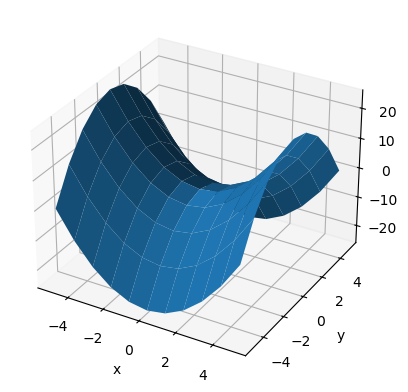

In [47]:
from matplotlib import pyplot as plt
from matplotlib import cm

x_vec = np.linspace(-5, 5, 11)
y_vec = np.linspace(-5, 5, 9)

X, Y = np.meshgrid(x_vec, y_vec)

Z = X**2 - Y**2

p, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

This is the first time that we met `np.meshgrid`.
It takes a range of x and a range of y and spits out every combination of x and y as two 2D arrays.

How does `meshgrid` work? It simply copies the range of x for n times with n being the length of the vector of y. It treats the range of y in a similar way.

In the above example, the range of x is given by `x_vec`. After processed by `meshgrid`, `x_vec` is copied 9 times because the lengh of the `y_vec` is 9. Check it out

In [51]:
print("Before meshgrid, the range of x is")
print(x_vec)
print("After meshgrid, the 2D array of x is")
print(X)

Before meshgrid, the range of x is
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
After meshgrid, the 2D array of x is
[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]]


You can color the surface by its Z value by passing a `cmap` argument

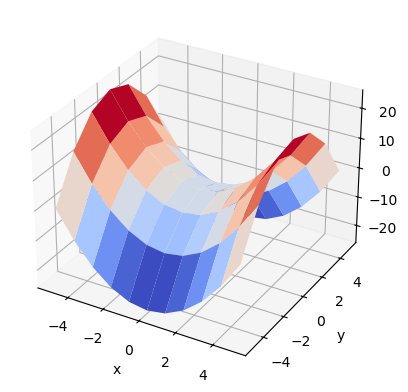

In [52]:
x_vec = np.linspace(-5, 5, 11)
y_vec = np.linspace(-5, 5, 7)

X, Y = np.meshgrid(x_vec, y_vec)

Z = X**2 - Y**2

p, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

You can use `view_init` to change angle of the "camera" i.e. your viewing angle. To rotate the camera about 90$\degree$ around the z-axis

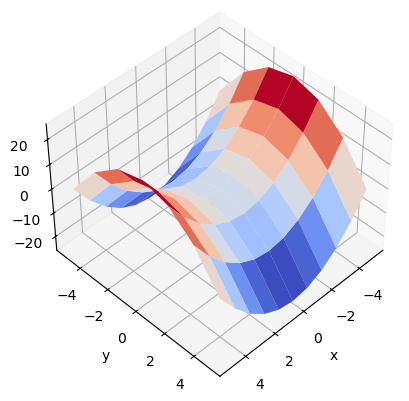

In [53]:
x_vec = np.linspace(-5, 5, 11)
y_vec = np.linspace(-5, 5, 7)

X, Y = np.meshgrid(x_vec, y_vec)

Z = X**2 - Y**2

p, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(45, 45, 0)
plt.show()

<h3 style="color:blue;">Task for Part 3</h3>

__3.1__ Make a 3D surface representing the function $Z = sin(X) + cos(Y)$ with both X and Y ranging from 0 to 20. Please color the surface according to its Z value

In [5]:
# your answer 3.1

